In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class steepest_descent():
    '''
    função a ser minimizada:
    np.exp(x1 + 3*x2 - 0.1) + np.exp(x1 - 2*x2 - 0.1) + np.exp(-x1 - 0.2)
    '''
    def __init__(self, alpha=0.001, tol = 1e-6, epochs=100):
        self.epochs = epochs
        self.alpha = alpha
        self.tol = tol
        
    def function(self, x):
        return np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-2*x[1]-0.1)+np.exp(-x[0]-0.2)
    
    def gradiente(self, x):
        # derivada primeira
        return np.array([np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-2*x[1]-0.1)-np.exp(-x[0]-0.2), 
                         3*np.exp(x[0]+3*x[1]-0.1)-2*np.exp(x[0]-2*x[1]-0.1)])
    
    def hessiana(self, x):
        # derivada segunda
        return np.array([[np.exp(x[0]+3*x[1]-0.1)+np.exp(x[0]-2*x[1]-0.1)+np.exp(-x[0]-0.2),
                          3*np.exp(x[0]+3*x[1]-0.1)-2*np.exp(x[0]-2*x[1]-0.1)],
                         [3*np.exp(x[0]+3*x[1]-0.1)-2*np.exp(x[0]-2*x[1]-0.1),
                          9*np.exp(x[0]+3*x[1]-0.1)+4*np.exp(x[0]-2*x[1]-0.1)]])
    
    def exact_line_search(self, ponto, grad):
        # realizando exact line search com descida da encosta
        t = 1
        s = 0.0001
        x = self.function([ponto[0] + t*grad[0], ponto[1] + t*grad[1]])

        for i in range(1000000):
            if self.function([ponto[0] + (t+s)*grad[0], ponto[1] + (t+s)*grad[1]]) < x:
                x = self.function([ponto[0] + (t+s)*grad[0], ponto[1] + (t+s)*grad[1]])
                t += s

            elif self.function([ponto[0] + (t-s)*grad[0], ponto[1] + (t-s)*grad[1]]) < x:
                x = self.function([ponto[0] + (t-s)*grad[0], ponto[1] + (t-s)*grad[1]])
                t -= s
            else:
                break
        return t

    def fit(self, x0, matrix):
        # encontrando o valor minimo de f(x)
        x = np.vstack((x0 + 2 * self.tol * np.ones(x0.shape),x0)).transpose()
        i = 1
        mat = -np.linalg.inv(matrix)
        
        while (np.linalg.norm(x[:,i]-x[:,i-1]) > self.tol ) and ( i < self.epochs ):
            
            grad = self.gradiente(x[:,i])
            p = -np.matmul(mat, grad)
            
            self.alpha = self.exact_line_search(x[:,i], p)
            xnew = x[:,i] + self.alpha * p
                
            x = np.concatenate((x, xnew.reshape((len(x0),1))), axis=1)
            i += 1
                
        return x[:,1:]

In [3]:
clf = steepest_descent(alpha=0.001, 
                            tol = 1e-6, 
                            epochs=100)

In [4]:
x0 = np.array([-1.,1])

In [15]:
# mat = np.eye(2) # k = 1 # mínimo encontrado = [-0.38650634, -0.08109327]
mat = clf.hessiana([-1,1]) # k = 31.83457609988881 ponto = [-0.38650253, -0.08108996]

In [16]:
np.linalg.norm(np.linalg.inv(mat), ord=2) * np.linalg.norm(mat,ord=2)

31.83457609988881

In [17]:
xbt = clf.fit(x0, mat)

In [19]:
xbt

array([[-1.        ,  0.28899572, -0.27228639, -0.01750625, -0.290581  ,
        -0.15201329, -0.31395722, -0.2269636 , -0.33227558, -0.27379622,
        -0.34592258, -0.30502801, -0.35603694, -0.32671195, -0.36355602,
        -0.3421685 , -0.36917394, -0.3533909 , -0.37338787, -0.36164256,
        -0.3765601 , -0.36776634, -0.37895594, -0.37234238, -0.38076923,
        -0.37577895, -0.38214361, -0.3783688 , -0.38318676, -0.38032601,
        -0.38397934, -0.38180828, -0.38458217, -0.38293265, -0.38504055,
        -0.3837864 , -0.38538955, -0.38443538, -0.38565531, -0.38492907,
        -0.38585773, -0.38530477, -0.38601196, -0.38559083, -0.38612943,
        -0.38580864, -0.38621899, -0.38597459, -0.38628722, -0.386101  ,
        -0.38633921, -0.3861973 , -0.38637884, -0.38627069, -0.38640904,
        -0.38632662, -0.38643206, -0.38636924, -0.38644959, -0.38640172,
        -0.38646294, -0.38642648, -0.38647313, -0.38644539, -0.38648092,
        -0.38645979, -0.38648683, -0.38647079, -0.3

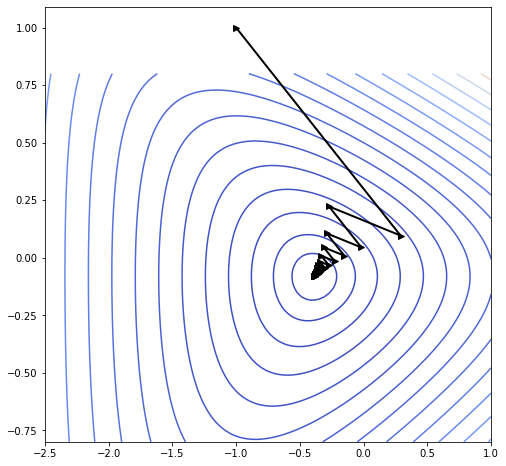

In [18]:
xvals = np.array([[np.linspace(-4,-0.5,20)], [np.zeros(20)]])
yvals = list(reversed(clf.function(xvals)[0]))

xx = np.linspace(-2.5,1,100)
yy = np.linspace(-0.8,0.8,100)
X, Y = np.meshgrid(xx, yy)

Z = clf.function(np.dstack((X,Y)).reshape((X.size, 2)).transpose())

Z = Z.reshape(X.shape)
cmap = plt.cm.get_cmap("coolwarm")
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.contour(X, Y, Z, yvals, cmap = cmap)
ax.plot(xbt[0,:], xbt[1,:], color='black', linewidth=2, marker='>')
plt.show()